In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, utils
import matplotlib.pyplot as plt
import numpy as np

# Loading Data

In [9]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() 

In [10]:
print('Train Data: ',train_data.shape)
print('Test Data: ',test_data.shape)

Train Data:  (404, 13)
Test Data:  (102, 13)


In [11]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [12]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

# Normalizing Data

In [13]:
# for normalization we do (x-mean)/std
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std
#test data must be normalized by train data values

In [14]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [15]:
train_data[0].shape

(13,)

# Building Model

In [16]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data[1].shape)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics = ['mae'])
    return model

# K-fold validation

In [23]:
k = 4
num_val_samples = len(train_data)//4
num_of_epochs = 100
all_score = []
print(num_val_samples)

101


In [25]:
for i in range(k):
    print('processing fold #', i)
    #Prepares the validation data: data from partition #k
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    #Prepares the training data: data from all other partitions
    partial_train_data = np.concatenate(
                        [train_data[:i*num_val_samples],
                         train_data[(i+1)*num_val_samples:]],
                        axis=0)
    
    partial_train_targets = np.concatenate(
                            [train_targets[:i*num_val_samples],
                             train_targets[(i+1)*num_val_samples:]],
                            axis=0)
    
    #Builds the Keras model (already compiled)
    model = build_model()
    
    #Trains the model (in silent mode, verbose = 0)
    model.fit(partial_train_data, partial_train_targets, epochs=100, batch_size=1, verbose=0)
    
    #Evaluates the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    
    all_score.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [26]:
all_score

[1.9363171, 2.3285794, 2.6372194, 2.3458345]

In [28]:
np.mean(all_score)

2.3119876

# Updating Epochs

In [30]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    #Prepares the validation data: data from partition #k
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    #Prepares the training data: data from all other partitions
    partial_train_data = np.concatenate(
                        [train_data[:i*num_val_samples],
                         train_data[(i+1)*num_val_samples:]],
                        axis=0)
    
    partial_train_targets = np.concatenate(
                            [train_targets[:i*num_val_samples],
                             train_targets[(i+1)*num_val_samples:]],
                            axis=0)
    
    #Builds the Keras model (already compiled)
    model = build_model()
    
    #Trains the model (in silent mode, verbose = 0)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1, 
                      validation_data=(val_data,val_targets)) 

processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 2s 7ms/sample - loss: 207.7560 - mae: 10.8693 - val_loss: 36.1952 - val_mae: 4.1482
Epoch 2/500
303/303 [==============================] - 1s 3ms/sample - loss: 30.0813 - mae: 3.8801 - val_loss: 21.8333 - val_mae: 3.0697
Epoch 3/500
303/303 [==============================] - 1s 3ms/sample - loss: 21.1824 - mae: 3.1625 - val_loss: 16.6863 - val_mae: 2.6292
Epoch 4/500
303/303 [==============================] - 1s 3ms/sample - loss: 18.2425 - mae: 2.8185 - val_loss: 16.2354 - val_mae: 2.5472
Epoch 5/500
303/303 [==============================] - 1s 3ms/sample - loss: 16.0241 - mae: 2.7144 - val_loss: 13.3397 - val_mae: 2.2814
Epoch 6/500
303/303 [==============================] - 1s 3ms/sample - loss: 15.0288 - mae: 2.5551 - val_loss: 12.1794 - val_mae: 2.2144
Epoch 7/500
303/303 [==============================] - 1s 3ms/sample - loss: 13.9401 - mae: 2.4772 - val_loss:

303/303 [==============================] - 1s 3ms/sample - loss: 5.8385 - mae: 1.5692 - val_loss: 7.4722 - val_mae: 1.9212
Epoch 61/500
303/303 [==============================] - 1s 3ms/sample - loss: 5.5447 - mae: 1.5743 - val_loss: 6.5689 - val_mae: 1.8741
Epoch 62/500
303/303 [==============================] - 1s 3ms/sample - loss: 5.6880 - mae: 1.5778 - val_loss: 7.3679 - val_mae: 2.0515
Epoch 63/500
303/303 [==============================] - 1s 3ms/sample - loss: 5.5031 - mae: 1.5574 - val_loss: 9.2992 - val_mae: 2.4713
Epoch 64/500
303/303 [==============================] - 1s 3ms/sample - loss: 5.8278 - mae: 1.5873 - val_loss: 7.6005 - val_mae: 2.1008
Epoch 65/500
303/303 [==============================] - 1s 3ms/sample - loss: 5.6211 - mae: 1.6695 - val_loss: 7.4068 - val_mae: 1.9082
Epoch 66/500
303/303 [==============================] - 1s 3ms/sample - loss: 5.7333 - mae: 1.5553 - val_loss: 7.4641 - val_mae: 2.1044
Epoch 67/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 1s 3ms/sample - loss: 3.3665 - mae: 1.2657 - val_loss: 9.0597 - val_mae: 2.2764
Epoch 121/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.5113 - mae: 1.2853 - val_loss: 6.9231 - val_mae: 1.9461
Epoch 122/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.6873 - mae: 1.2977 - val_loss: 9.0089 - val_mae: 2.0939
Epoch 123/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.4159 - mae: 1.2539 - val_loss: 8.9437 - val_mae: 2.1271
Epoch 124/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.4214 - mae: 1.2784 - val_loss: 8.2996 - val_mae: 2.1517
Epoch 125/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.3303 - mae: 1.3205 - val_loss: 8.0869 - val_mae: 2.0642
Epoch 126/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.4887 - mae: 1.2765 - val_loss: 8.0038 - val_mae: 2.0920
Epoch 127/500
303/303 [==============================] 

Epoch 180/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.4597 - mae: 1.0559 - val_loss: 10.1226 - val_mae: 2.3842
Epoch 181/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.5649 - mae: 1.1023 - val_loss: 8.7003 - val_mae: 2.0875
Epoch 182/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.1395 - mae: 1.0592 - val_loss: 9.5022 - val_mae: 2.3452
Epoch 183/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.3496 - mae: 1.0680 - val_loss: 8.4590 - val_mae: 2.1735
Epoch 184/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.2380 - mae: 1.0684 - val_loss: 8.9856 - val_mae: 2.2251
Epoch 185/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.2713 - mae: 1.1014 - val_loss: 10.2925 - val_mae: 2.2687
Epoch 186/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.5353 - mae: 1.1324 - val_loss: 11.7862 - val_mae: 2.5205
Epoch 187/500
303/303 [===============

303/303 [==============================] - 1s 3ms/sample - loss: 1.9474 - mae: 1.0327 - val_loss: 12.7592 - val_mae: 2.5705
Epoch 240/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.7890 - mae: 0.9548 - val_loss: 9.3484 - val_mae: 2.1814
Epoch 241/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.9357 - mae: 1.0184 - val_loss: 9.1867 - val_mae: 2.2069
Epoch 242/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.7801 - mae: 0.9557 - val_loss: 11.1920 - val_mae: 2.3407
Epoch 243/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.9254 - mae: 0.9948 - val_loss: 9.7627 - val_mae: 2.2631
Epoch 244/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.8026 - mae: 0.9620 - val_loss: 10.6081 - val_mae: 2.3762
Epoch 245/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.6429 - mae: 0.9716 - val_loss: 10.7981 - val_mae: 2.4109
Epoch 246/500
303/303 [============================

Epoch 299/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4022 - mae: 0.8835 - val_loss: 10.5122 - val_mae: 2.3917
Epoch 300/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4683 - mae: 0.8804 - val_loss: 8.8525 - val_mae: 2.2157
Epoch 301/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5725 - mae: 0.9316 - val_loss: 9.5641 - val_mae: 2.2437
Epoch 302/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4480 - mae: 0.8686 - val_loss: 9.3340 - val_mae: 2.2380
Epoch 303/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.3713 - mae: 0.8798 - val_loss: 10.6406 - val_mae: 2.3640
Epoch 304/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.3656 - mae: 0.8971 - val_loss: 10.9403 - val_mae: 2.4556
Epoch 305/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4996 - mae: 0.9081 - val_loss: 10.1399 - val_mae: 2.3534
Epoch 306/500
303/303 [==============

303/303 [==============================] - 1s 3ms/sample - loss: 1.1366 - mae: 0.8057 - val_loss: 9.0233 - val_mae: 2.2889
Epoch 359/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.2642 - mae: 0.8388 - val_loss: 9.3490 - val_mae: 2.3682
Epoch 360/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1872 - mae: 0.7785 - val_loss: 8.5913 - val_mae: 2.1395
Epoch 361/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.3020 - mae: 0.8479 - val_loss: 9.2456 - val_mae: 2.2717
Epoch 362/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0985 - mae: 0.7535 - val_loss: 10.0944 - val_mae: 2.3813
Epoch 363/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0789 - mae: 0.7784 - val_loss: 11.5369 - val_mae: 2.5695
Epoch 364/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.2038 - mae: 0.8292 - val_loss: 9.8462 - val_mae: 2.3399
Epoch 365/500
303/303 [==============================

Epoch 418/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0374 - mae: 0.7636 - val_loss: 10.1806 - val_mae: 2.4034
Epoch 419/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9456 - mae: 0.7395 - val_loss: 10.5957 - val_mae: 2.4631
Epoch 420/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0382 - mae: 0.7782 - val_loss: 9.6785 - val_mae: 2.4107
Epoch 421/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0043 - mae: 0.7530 - val_loss: 10.0738 - val_mae: 2.3792
Epoch 422/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9849 - mae: 0.7422 - val_loss: 10.2131 - val_mae: 2.4477
Epoch 423/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.2143 - mae: 0.7795 - val_loss: 9.6564 - val_mae: 2.3907
Epoch 424/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1722 - mae: 0.8066 - val_loss: 9.7863 - val_mae: 2.3887
Epoch 425/500
303/303 [==============

303/303 [==============================] - 1s 3ms/sample - loss: 0.8763 - mae: 0.7112 - val_loss: 11.4056 - val_mae: 2.5953
Epoch 478/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9639 - mae: 0.7189 - val_loss: 9.5126 - val_mae: 2.3569
Epoch 479/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9487 - mae: 0.7471 - val_loss: 9.4901 - val_mae: 2.3869
Epoch 480/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8414 - mae: 0.6946 - val_loss: 10.7363 - val_mae: 2.5479
Epoch 481/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9843 - mae: 0.7157 - val_loss: 9.6262 - val_mae: 2.4114
Epoch 482/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9169 - mae: 0.7083 - val_loss: 9.5116 - val_mae: 2.4510
Epoch 483/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9410 - mae: 0.7301 - val_loss: 9.3735 - val_mae: 2.4121
Epoch 484/500
303/303 [==============================

303/303 [==============================] - 1s 3ms/sample - loss: 6.8965 - mae: 1.7924 - val_loss: 10.5686 - val_mae: 2.4576
Epoch 37/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.7416 - mae: 1.7397 - val_loss: 9.3680 - val_mae: 2.3120
Epoch 38/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.3504 - mae: 1.7418 - val_loss: 9.5540 - val_mae: 2.3672
Epoch 39/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.9319 - mae: 1.7443 - val_loss: 8.7022 - val_mae: 2.2329
Epoch 40/500
303/303 [==============================] - 1s 3ms/sample - loss: 7.2620 - mae: 1.6933 - val_loss: 9.3935 - val_mae: 2.3076
Epoch 41/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.7119 - mae: 1.7022 - val_loss: 9.5075 - val_mae: 2.3111
Epoch 42/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.5831 - mae: 1.7293 - val_loss: 13.6017 - val_mae: 2.8532
Epoch 43/500
303/303 [==============================] - 1s 

Epoch 96/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.6568 - mae: 1.2825 - val_loss: 17.1687 - val_mae: 2.9469
Epoch 97/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.8194 - mae: 1.3363 - val_loss: 14.7076 - val_mae: 2.6932
Epoch 98/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.5397 - mae: 1.2742 - val_loss: 16.0995 - val_mae: 2.6987
Epoch 99/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.6751 - mae: 1.2526 - val_loss: 14.2276 - val_mae: 2.7346
Epoch 100/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.5817 - mae: 1.2618 - val_loss: 17.7107 - val_mae: 2.7775
Epoch 101/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.4527 - mae: 1.2563 - val_loss: 14.4655 - val_mae: 2.7244
Epoch 102/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.6922 - mae: 1.2432 - val_loss: 13.9837 - val_mae: 2.5691
Epoch 103/500
303/303 [===============

303/303 [==============================] - 1s 3ms/sample - loss: 2.1744 - mae: 1.0501 - val_loss: 16.6830 - val_mae: 2.7136
Epoch 156/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.1398 - mae: 1.0146 - val_loss: 13.7360 - val_mae: 2.5318
Epoch 157/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.0278 - mae: 1.0008 - val_loss: 18.6749 - val_mae: 3.0072
Epoch 158/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.1016 - mae: 0.9995 - val_loss: 20.7670 - val_mae: 2.9699
Epoch 159/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.0518 - mae: 0.9982 - val_loss: 16.6018 - val_mae: 2.7016
Epoch 160/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.2258 - mae: 1.0698 - val_loss: 17.1999 - val_mae: 2.7978
Epoch 161/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.1406 - mae: 1.0403 - val_loss: 17.4179 - val_mae: 2.8790
Epoch 162/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.4883 - mae: 0.8945 - val_loss: 18.0358 - val_mae: 2.7823
Epoch 215/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5201 - mae: 0.8930 - val_loss: 14.6687 - val_mae: 2.6104
Epoch 216/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.2932 - mae: 0.8328 - val_loss: 23.5859 - val_mae: 2.9903
Epoch 217/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5275 - mae: 0.8822 - val_loss: 17.1510 - val_mae: 2.8794
Epoch 218/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.2896 - mae: 0.8548 - val_loss: 27.4465 - val_mae: 3.1987
Epoch 219/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4227 - mae: 0.8571 - val_loss: 18.0074 - val_mae: 2.7483
Epoch 220/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.3899 - mae: 0.8385 - val_loss: 27.4448 - val_mae: 3.3235
Epoch 221/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.1633 - mae: 0.7929 - val_loss: 21.0569 - val_mae: 2.7720
Epoch 274/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1268 - mae: 0.8003 - val_loss: 15.3331 - val_mae: 2.6362
Epoch 275/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.2395 - mae: 0.8022 - val_loss: 21.1463 - val_mae: 2.8879
Epoch 276/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.2248 - mae: 0.7907 - val_loss: 22.7448 - val_mae: 2.9220
Epoch 277/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.2372 - mae: 0.8080 - val_loss: 22.1638 - val_mae: 2.9069
Epoch 278/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1662 - mae: 0.7950 - val_loss: 27.8641 - val_mae: 3.2328
Epoch 279/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1713 - mae: 0.7827 - val_loss: 17.8456 - val_mae: 2.6345
Epoch 280/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.0004 - mae: 0.7201 - val_loss: 16.2626 - val_mae: 2.7598
Epoch 333/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9412 - mae: 0.6951 - val_loss: 16.1242 - val_mae: 2.6901
Epoch 334/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0029 - mae: 0.7386 - val_loss: 15.5773 - val_mae: 2.6539
Epoch 335/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9960 - mae: 0.7370 - val_loss: 17.8327 - val_mae: 2.7387
Epoch 336/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9388 - mae: 0.7079 - val_loss: 17.1466 - val_mae: 2.6661
Epoch 337/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9653 - mae: 0.7103 - val_loss: 16.8197 - val_mae: 2.7931
Epoch 338/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0358 - mae: 0.7678 - val_loss: 18.1579 - val_mae: 2.8296
Epoch 339/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 0.8616 - mae: 0.6771 - val_loss: 15.2596 - val_mae: 2.7485
Epoch 392/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9832 - mae: 0.7110 - val_loss: 16.8358 - val_mae: 2.6035
Epoch 393/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8690 - mae: 0.7011 - val_loss: 17.1526 - val_mae: 2.6863
Epoch 394/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8279 - mae: 0.6538 - val_loss: 15.1441 - val_mae: 2.5831
Epoch 395/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9709 - mae: 0.6984 - val_loss: 15.1871 - val_mae: 2.6792
Epoch 396/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8066 - mae: 0.6626 - val_loss: 16.0301 - val_mae: 2.6770
Epoch 397/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8114 - mae: 0.6641 - val_loss: 17.4361 - val_mae: 2.6614
Epoch 398/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 0.7527 - mae: 0.6305 - val_loss: 12.3341 - val_mae: 2.5709
Epoch 451/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.7783 - mae: 0.6734 - val_loss: 14.1530 - val_mae: 2.5954
Epoch 452/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.7275 - mae: 0.6450 - val_loss: 12.9060 - val_mae: 2.5738
Epoch 453/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9141 - mae: 0.6734 - val_loss: 15.3183 - val_mae: 2.7542
Epoch 454/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.7760 - mae: 0.6677 - val_loss: 16.3755 - val_mae: 2.7682
Epoch 455/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8161 - mae: 0.6642 - val_loss: 13.4523 - val_mae: 2.5822
Epoch 456/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8862 - mae: 0.6654 - val_loss: 14.2521 - val_mae: 2.7020
Epoch 457/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 10.7783 - mae: 2.3469 - val_loss: 16.4116 - val_mae: 2.7605
Epoch 10/500
303/303 [==============================] - 1s 3ms/sample - loss: 9.9872 - mae: 2.2490 - val_loss: 16.0731 - val_mae: 2.8361
Epoch 11/500
303/303 [==============================] - 1s 3ms/sample - loss: 9.6929 - mae: 2.2756 - val_loss: 15.5564 - val_mae: 2.5254
Epoch 12/500
303/303 [==============================] - 1s 3ms/sample - loss: 9.3742 - mae: 2.1691 - val_loss: 14.1558 - val_mae: 2.4887
Epoch 13/500
303/303 [==============================] - 1s 3ms/sample - loss: 8.8719 - mae: 2.1561 - val_loss: 15.8119 - val_mae: 2.5690
Epoch 14/500
303/303 [==============================] - 1s 3ms/sample - loss: 8.8701 - mae: 2.0995 - val_loss: 15.2816 - val_mae: 2.7281
Epoch 15/500
303/303 [==============================] - 1s 3ms/sample - loss: 8.6876 - mae: 2.1144 - val_loss: 15.5723 - val_mae: 2.6752
Epoch 16/500
303/303 [==============================]

Epoch 69/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.0998 - mae: 1.4174 - val_loss: 17.4950 - val_mae: 2.7547
Epoch 70/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.2728 - mae: 1.4077 - val_loss: 16.6896 - val_mae: 2.6482
Epoch 71/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.0766 - mae: 1.3994 - val_loss: 20.7702 - val_mae: 3.1367
Epoch 72/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.0861 - mae: 1.4270 - val_loss: 17.1703 - val_mae: 2.7898
Epoch 73/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.2266 - mae: 1.4310 - val_loss: 16.3855 - val_mae: 2.6472
Epoch 74/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.2278 - mae: 1.4105 - val_loss: 16.5807 - val_mae: 2.7215
Epoch 75/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.0297 - mae: 1.4160 - val_loss: 16.2070 - val_mae: 2.6797
Epoch 76/500
303/303 [===================

303/303 [==============================] - 1s 3ms/sample - loss: 2.4858 - mae: 1.1322 - val_loss: 15.3035 - val_mae: 2.7222
Epoch 129/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.4003 - mae: 1.1401 - val_loss: 15.7200 - val_mae: 2.6288
Epoch 130/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.9118 - mae: 1.1995 - val_loss: 16.9492 - val_mae: 2.8738
Epoch 131/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.4228 - mae: 1.1166 - val_loss: 18.2507 - val_mae: 3.0366
Epoch 132/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.8297 - mae: 1.2041 - val_loss: 15.4519 - val_mae: 2.7502
Epoch 133/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.3623 - mae: 1.1296 - val_loss: 16.4313 - val_mae: 2.7351
Epoch 134/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.5762 - mae: 1.1786 - val_loss: 15.3439 - val_mae: 2.6535
Epoch 135/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.7695 - mae: 0.9773 - val_loss: 14.3791 - val_mae: 2.6119
Epoch 188/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5576 - mae: 0.8971 - val_loss: 18.1611 - val_mae: 2.9497
Epoch 189/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.8246 - mae: 0.9510 - val_loss: 14.7873 - val_mae: 2.7573
Epoch 190/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.6872 - mae: 0.9560 - val_loss: 15.2282 - val_mae: 2.7188
Epoch 191/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5452 - mae: 0.9132 - val_loss: 17.9390 - val_mae: 2.9693
Epoch 192/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5348 - mae: 0.9355 - val_loss: 17.3609 - val_mae: 2.8577
Epoch 193/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5780 - mae: 0.8991 - val_loss: 15.5202 - val_mae: 2.7467
Epoch 194/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.2286 - mae: 0.8110 - val_loss: 15.8402 - val_mae: 2.7817
Epoch 247/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.3268 - mae: 0.8309 - val_loss: 17.8497 - val_mae: 2.9469
Epoch 248/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.2447 - mae: 0.8312 - val_loss: 16.7564 - val_mae: 2.8659
Epoch 249/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.2816 - mae: 0.8061 - val_loss: 17.8714 - val_mae: 2.8644
Epoch 250/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.2965 - mae: 0.8361 - val_loss: 15.2831 - val_mae: 2.7320
Epoch 251/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.3344 - mae: 0.8067 - val_loss: 15.8891 - val_mae: 2.7517
Epoch 252/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0827 - mae: 0.7688 - val_loss: 17.3174 - val_mae: 2.9586
Epoch 253/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.1152 - mae: 0.7588 - val_loss: 15.7693 - val_mae: 2.6762
Epoch 306/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0008 - mae: 0.7463 - val_loss: 15.9185 - val_mae: 2.7051
Epoch 307/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9995 - mae: 0.7233 - val_loss: 15.6750 - val_mae: 2.6727
Epoch 308/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0156 - mae: 0.7459 - val_loss: 17.3532 - val_mae: 2.8077
Epoch 309/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1980 - mae: 0.7795 - val_loss: 16.2118 - val_mae: 2.8250
Epoch 310/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9896 - mae: 0.7237 - val_loss: 16.8203 - val_mae: 2.8617
Epoch 311/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0489 - mae: 0.7556 - val_loss: 17.3625 - val_mae: 2.8934
Epoch 312/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.0172 - mae: 0.7123 - val_loss: 16.5941 - val_mae: 2.8427
Epoch 365/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9683 - mae: 0.7335 - val_loss: 17.1990 - val_mae: 2.8272
Epoch 366/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8899 - mae: 0.6695 - val_loss: 17.6442 - val_mae: 2.8252
Epoch 367/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9923 - mae: 0.6975 - val_loss: 16.8321 - val_mae: 2.8642
Epoch 368/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9348 - mae: 0.6946 - val_loss: 17.2182 - val_mae: 2.8196
Epoch 369/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8715 - mae: 0.6844 - val_loss: 16.7874 - val_mae: 2.7546
Epoch 370/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8639 - mae: 0.6795 - val_loss: 17.1897 - val_mae: 2.8227
Epoch 371/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 0.8762 - mae: 0.6603 - val_loss: 17.4473 - val_mae: 2.8975
Epoch 424/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8396 - mae: 0.6850 - val_loss: 15.7285 - val_mae: 2.7662
Epoch 425/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8250 - mae: 0.6668 - val_loss: 17.6315 - val_mae: 2.8678
Epoch 426/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8849 - mae: 0.6469 - val_loss: 16.8714 - val_mae: 2.7951
Epoch 427/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.7924 - mae: 0.6485 - val_loss: 17.6391 - val_mae: 2.9870
Epoch 428/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8185 - mae: 0.6909 - val_loss: 17.7536 - val_mae: 2.9456
Epoch 429/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0174 - mae: 0.6947 - val_loss: 16.1251 - val_mae: 2.7969
Epoch 430/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 0.7552 - mae: 0.6416 - val_loss: 17.3201 - val_mae: 2.8422
Epoch 483/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.7351 - mae: 0.6175 - val_loss: 16.7466 - val_mae: 2.9207
Epoch 484/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8402 - mae: 0.6353 - val_loss: 17.5350 - val_mae: 2.8922
Epoch 485/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.7039 - mae: 0.5833 - val_loss: 15.6888 - val_mae: 2.7943
Epoch 486/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8397 - mae: 0.6153 - val_loss: 16.5907 - val_mae: 2.8577
Epoch 487/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.7149 - mae: 0.6149 - val_loss: 15.1825 - val_mae: 2.7154
Epoch 488/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8263 - mae: 0.6405 - val_loss: 16.7816 - val_mae: 2.8798
Epoch 489/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 6.7250 - mae: 1.7051 - val_loss: 12.6677 - val_mae: 2.3512
Epoch 42/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.6878 - mae: 1.6823 - val_loss: 12.5089 - val_mae: 2.4377
Epoch 43/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.7317 - mae: 1.6721 - val_loss: 13.1621 - val_mae: 2.4345
Epoch 44/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.5140 - mae: 1.6513 - val_loss: 13.2082 - val_mae: 2.5221
Epoch 45/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.3663 - mae: 1.6561 - val_loss: 11.8514 - val_mae: 2.2434
Epoch 46/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.5482 - mae: 1.6168 - val_loss: 12.2039 - val_mae: 2.3898
Epoch 47/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.4598 - mae: 1.6810 - val_loss: 12.2493 - val_mae: 2.3163
Epoch 48/500
303/303 [==============================] 

Epoch 101/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.0309 - mae: 1.2809 - val_loss: 13.3073 - val_mae: 2.3286
Epoch 102/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.9675 - mae: 1.3027 - val_loss: 14.8506 - val_mae: 2.5379
Epoch 103/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.1921 - mae: 1.2579 - val_loss: 12.2817 - val_mae: 2.2673
Epoch 104/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.8295 - mae: 1.2325 - val_loss: 12.8794 - val_mae: 2.2872
Epoch 105/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.2427 - mae: 1.3004 - val_loss: 13.8496 - val_mae: 2.4473
Epoch 106/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.9799 - mae: 1.2800 - val_loss: 13.6519 - val_mae: 2.3998
Epoch 107/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.9846 - mae: 1.2345 - val_loss: 12.9125 - val_mae: 2.3384
Epoch 108/500
303/303 [===========

303/303 [==============================] - 1s 3ms/sample - loss: 2.7449 - mae: 1.0413 - val_loss: 12.3379 - val_mae: 2.4221
Epoch 161/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.4673 - mae: 1.0707 - val_loss: 11.7446 - val_mae: 2.2465
Epoch 162/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.4360 - mae: 1.0626 - val_loss: 13.0001 - val_mae: 2.4186
Epoch 163/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.5997 - mae: 1.0506 - val_loss: 12.2724 - val_mae: 2.3181
Epoch 164/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.3674 - mae: 1.0502 - val_loss: 11.7356 - val_mae: 2.2933
Epoch 165/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.6834 - mae: 1.0946 - val_loss: 11.8021 - val_mae: 2.2247
Epoch 166/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.8418 - mae: 1.1021 - val_loss: 11.3136 - val_mae: 2.2417
Epoch 167/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 2.0533 - mae: 1.0075 - val_loss: 13.4574 - val_mae: 2.4539
Epoch 220/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.9264 - mae: 0.9657 - val_loss: 13.1175 - val_mae: 2.4821
Epoch 221/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.0516 - mae: 0.9526 - val_loss: 12.0935 - val_mae: 2.4279
Epoch 222/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.0554 - mae: 0.9876 - val_loss: 13.2182 - val_mae: 2.4249
Epoch 223/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.9160 - mae: 0.9753 - val_loss: 14.6946 - val_mae: 2.7265
Epoch 224/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.9325 - mae: 0.9698 - val_loss: 13.7368 - val_mae: 2.6308
Epoch 225/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.9383 - mae: 0.9699 - val_loss: 13.8650 - val_mae: 2.4842
Epoch 226/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.6222 - mae: 0.9089 - val_loss: 13.8293 - val_mae: 2.4827
Epoch 279/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.7048 - mae: 0.8951 - val_loss: 16.7220 - val_mae: 2.6698
Epoch 280/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5355 - mae: 0.8752 - val_loss: 13.0592 - val_mae: 2.4860
Epoch 281/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4885 - mae: 0.9286 - val_loss: 13.4708 - val_mae: 2.4477
Epoch 282/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5268 - mae: 0.8711 - val_loss: 12.9367 - val_mae: 2.5116
Epoch 283/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4977 - mae: 0.9009 - val_loss: 14.7572 - val_mae: 2.5266
Epoch 284/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.6162 - mae: 0.8966 - val_loss: 12.8179 - val_mae: 2.5345
Epoch 285/500
303/303 [=========================

303/303 [==============================] - 1s 4ms/sample - loss: 1.4383 - mae: 0.8354 - val_loss: 14.9094 - val_mae: 2.7241
Epoch 338/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.3640 - mae: 0.8607 - val_loss: 14.6862 - val_mae: 2.6788
Epoch 339/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.3321 - mae: 0.8297 - val_loss: 14.1870 - val_mae: 2.5041
Epoch 340/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4170 - mae: 0.8700 - val_loss: 15.5099 - val_mae: 2.7993
Epoch 341/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.3273 - mae: 0.8611 - val_loss: 14.2337 - val_mae: 2.6591
Epoch 342/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.3342 - mae: 0.8239 - val_loss: 14.1467 - val_mae: 2.6432
Epoch 343/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1925 - mae: 0.8018 - val_loss: 14.1931 - val_mae: 2.7083
Epoch 344/500
303/303 [=========================

303/303 [==============================] - 1s 4ms/sample - loss: 1.2614 - mae: 0.7975 - val_loss: 13.4974 - val_mae: 2.5578
Epoch 397/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1271 - mae: 0.7320 - val_loss: 13.2977 - val_mae: 2.6156
Epoch 398/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.2108 - mae: 0.7970 - val_loss: 12.3079 - val_mae: 2.5256
Epoch 399/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1449 - mae: 0.7537 - val_loss: 12.7996 - val_mae: 2.6093
Epoch 400/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0371 - mae: 0.7533 - val_loss: 12.7555 - val_mae: 2.5524
Epoch 401/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1375 - mae: 0.7857 - val_loss: 12.9160 - val_mae: 2.5239
Epoch 402/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0591 - mae: 0.7774 - val_loss: 12.5355 - val_mae: 2.5392
Epoch 403/500
303/303 [=========================

303/303 [==============================] - 1s 4ms/sample - loss: 0.8610 - mae: 0.6896 - val_loss: 14.2041 - val_mae: 2.6931
Epoch 456/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9884 - mae: 0.7599 - val_loss: 13.0611 - val_mae: 2.6207
Epoch 457/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.0147 - mae: 0.7348 - val_loss: 12.3467 - val_mae: 2.4990
Epoch 458/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.9970 - mae: 0.7466 - val_loss: 12.7835 - val_mae: 2.5238
Epoch 459/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0298 - mae: 0.7533 - val_loss: 13.7329 - val_mae: 2.6508
Epoch 460/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9960 - mae: 0.7108 - val_loss: 13.9093 - val_mae: 2.5947
Epoch 461/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8603 - mae: 0.6799 - val_loss: 12.5079 - val_mae: 2.5381
Epoch 462/500
303/303 [=========================

In [34]:
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [35]:
#Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# Plotting validation scores

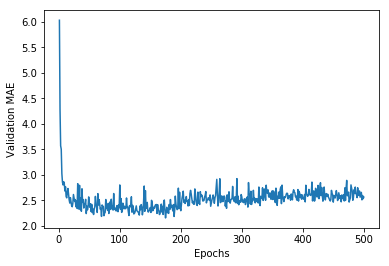

In [36]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Plotting validation scores, excluding the first 10 data points

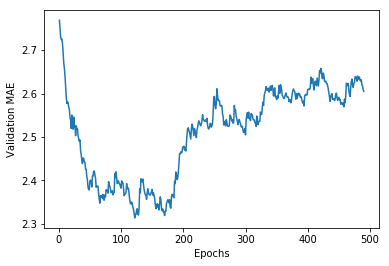

In [37]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Training the final model

In [38]:
#Gets a fresh, compiled model
model = build_model()

#Trains it on the entirety of the data
model.fit(train_data, train_targets, epochs=80, batch_size=16)

Train on 404 samples
Epoch 1/80
404/404 [==============================] - 1s 3ms/sample - loss: 465.7554 - mae: 19.5698
Epoch 2/80
404/404 [==============================] - 0s 198us/sample - loss: 279.2715 - mae: 14.3719
Epoch 3/80
404/404 [==============================] - 0s 206us/sample - loss: 117.8792 - mae: 8.5826
Epoch 4/80
404/404 [==============================] - 0s 253us/sample - loss: 52.8303 - mae: 5.3538
Epoch 5/80
404/404 [==============================] - 0s 262us/sample - loss: 31.9277 - mae: 4.0349
Epoch 6/80
404/404 [==============================] - 0s 205us/sample - loss: 23.6979 - mae: 3.4652
Epoch 7/80
404/404 [==============================] - 0s 255us/sample - loss: 19.8070 - mae: 3.1246
Epoch 8/80
404/404 [==============================] - 0s 203us/sample - loss: 17.4486 - mae: 2.9071
Epoch 9/80
404/404 [==============================] - 0s 213us/sample - loss: 15.8382 - mae: 2.8217
Epoch 10/80
404/404 [==============================] - 0s 238us/sample - los

# Testing final model

In [39]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [40]:
test_mae_score

3.1662023